In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

# Loading Data

In [2]:
df=pd.read_csv("data_for_lr.csv")

In [3]:
print(df)

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]


In [4]:
print(df.isnull().sum())

x    0
y    1
dtype: int64


In [5]:
df=df.dropna()

In [6]:
# taring input and output
train_input=np.array(df.x[0:500]).reshape(500,1)
train_output=np.array(df.y[0:500]).reshape(500,1)

#Validation data input and output
test_input=np.array(df.x[500:699]).reshape(199,1)
test_output=np.array(df.y[500:699]).reshape(199,1)

In [7]:
print(f"training input data shape={train_input.shape}")
print(f"training input data shape={train_output.shape}")
print(f"training input data shape={test_input.shape}")
print(f"training input data shape={test_output.shape}")

training input data shape=(500, 1)
training input data shape=(500, 1)
training input data shape=(199, 1)
training input data shape=(199, 1)


# <font color = "green">Linear Regression</font>

# Forward Propogation 

In [8]:
 def forward_propagation(train_input ,parameters):
     m=parameters['m']
     c=parameters['c']
     predictions= np.multiply(m, train_input) + c
     return predictions

# Cost Function

In [9]:
def cost_function(predictions, train_output):
    cost=np.mean((train_output- predictions)**2)*0.5
    return cost
    

# Gradient Descent for Backpropagation

In [16]:
# df=summ(f(x)-y)/n
#dm=df*x
#dc=df*1

In [10]:
def backward_propagation(train_input, train_output, predictions):
    derivatives=dict()
    df=predictions-train_output
    dm=np.mean(np.multiply(df,train_input))
    dc=np.mean(df)
    derivatives['dm']=dm
    derivatives['dc']=dc
    return derivatives

# Update Parameters


In [18]:
#m=m-(learning_rate*dm)
#c=c-(learning_rate*dc)

In [11]:
def update_parameter(parameters, derivatives, learning_rate):
    parameters['m']=parameters['m']-learning_rate * derivatives['dm']
    parameters['c']=parameters['c']-learning_rate * derivatives['dc']
    return parameters

# Model Training

In [12]:
def train(train_input, train_output, learning_rate, iters):
    #random parametrers
    parameters=dict()
    parameters['m']=np.random.uniform(0,1)
    parameters['c']=np.random.uniform(0,1)

    plt.figure()

    #loss
    loss=list()
    # iteration
    for i in range(iters):
    
        #forward propagation
        predictions=forward_propagation(train_input,parameters)
        #cost
        cost=cost_function(predictions,train_output)
        loss.append(cost)
        print(f"Iteration={i+1}, Loss={cost}")
        #plot
        fig,ax=plt.subplots()

        ax.plot(train_input, train_output, "+",label="Original")
        ax.plot(train_input, predictions, "*",label="Training")
        legend=ax.legend()

        plt.plot(train_input, train_output, "+",label="Original")
        plt.plot(train_input, predictions, "*",label="Training")
        plt.show()
        #back popagation
        derivatives=backward_propagation(train_input, train_output, predictions)
        #update
        parameters=update_parameter(parameters, derivatives, learning_rate)

    return parameters, loss 
         

        

Iteration = 1, Loss = 886.0861748670018


<Figure size 640x480 with 0 Axes>

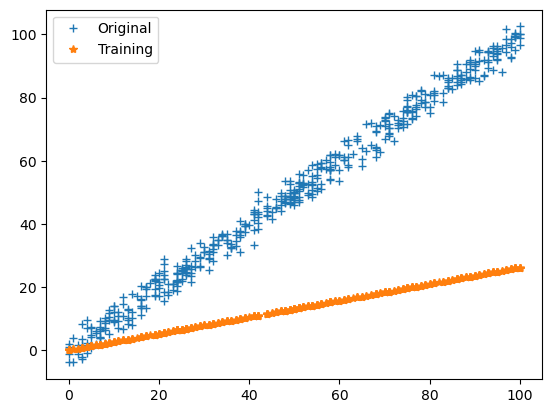

Iteration = 2, Loss = 404.15903941512863


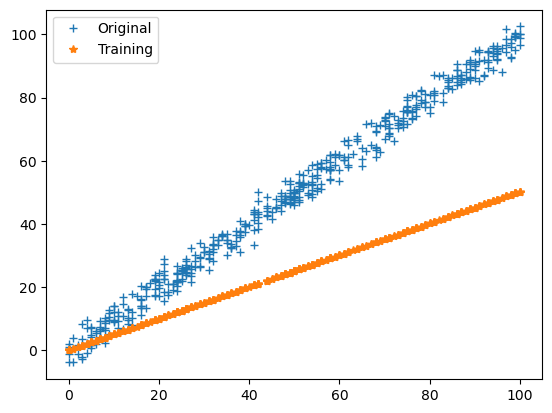

Iteration = 3, Loss = 185.50816402981786


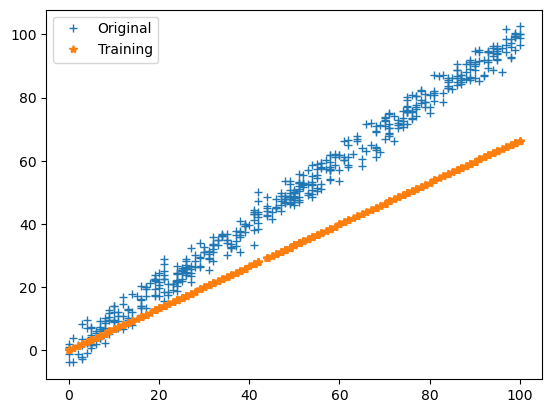

Iteration = 4, Loss = 86.30601945235443


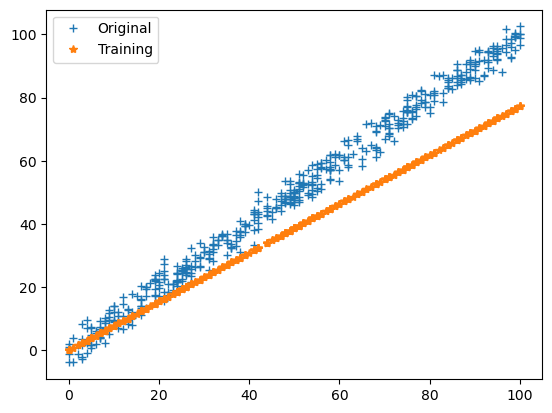

Iteration = 5, Loss = 41.297896348760055


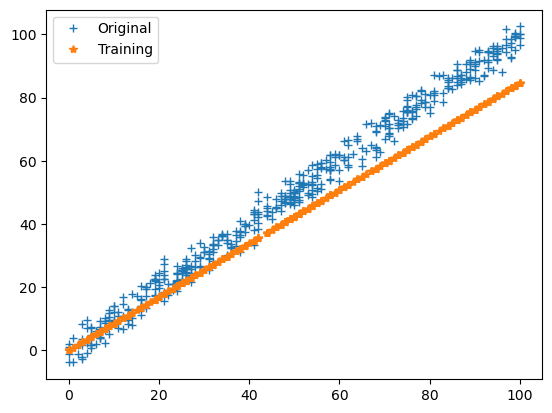

Iteration = 6, Loss = 20.877660815403303


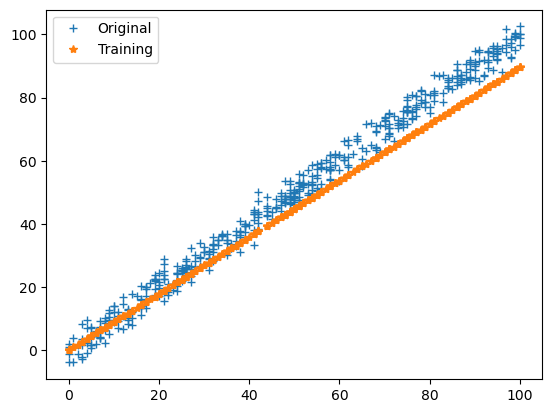

Iteration = 7, Loss = 11.6129771072325


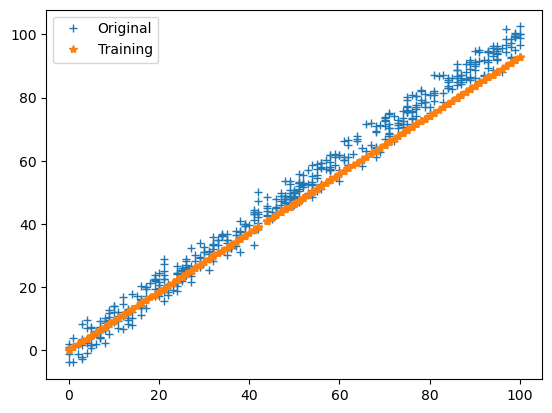

Iteration = 8, Loss = 7.409579618509046


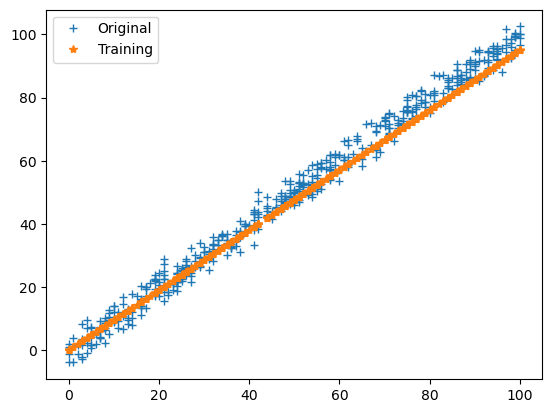

Iteration = 9, Loss = 5.502493293649568


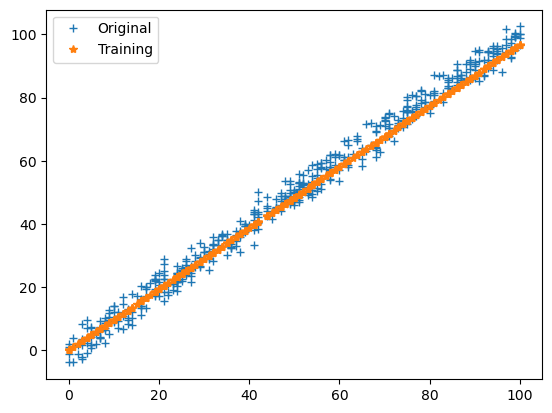

Iteration = 10, Loss = 4.637245887335578


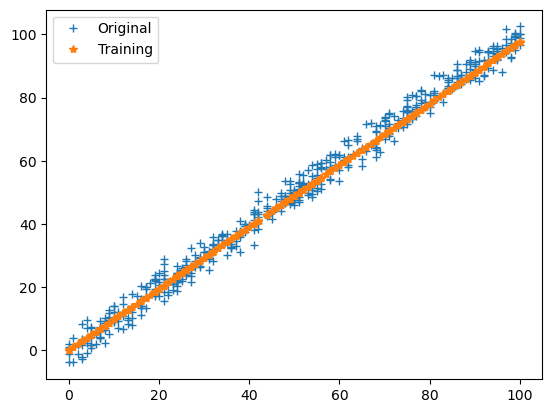

Iteration = 11, Loss = 4.244681952360886


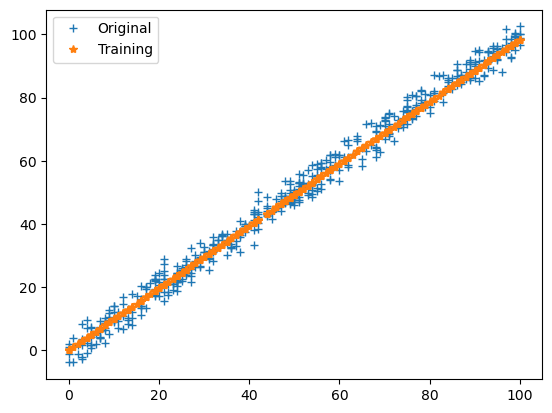

Iteration = 12, Loss = 4.066575031908044


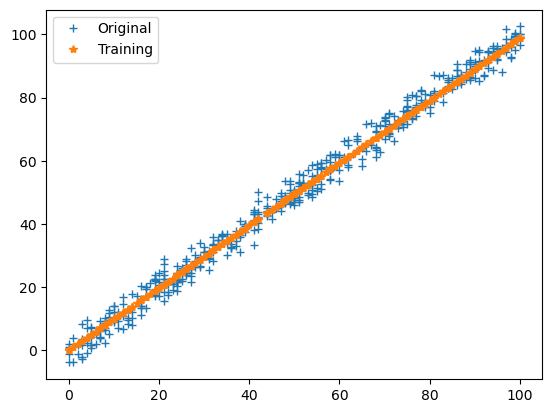

Iteration = 13, Loss = 3.985767496496687


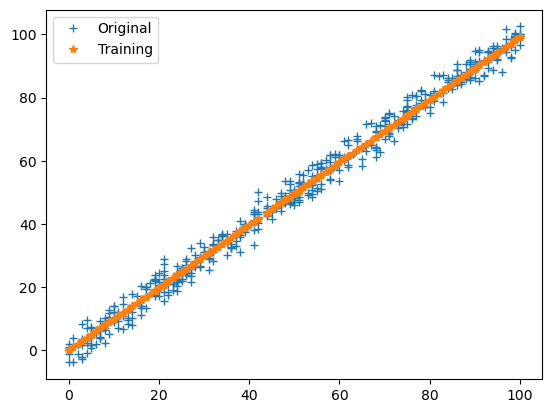

Iteration = 14, Loss = 3.9491047998629636


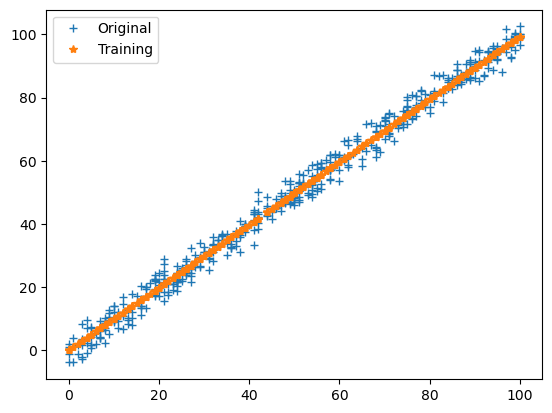

Iteration = 15, Loss = 3.9324706654907975


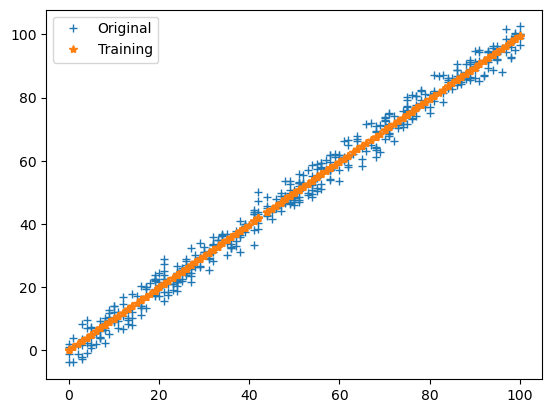

Iteration = 16, Loss = 3.92492351201266


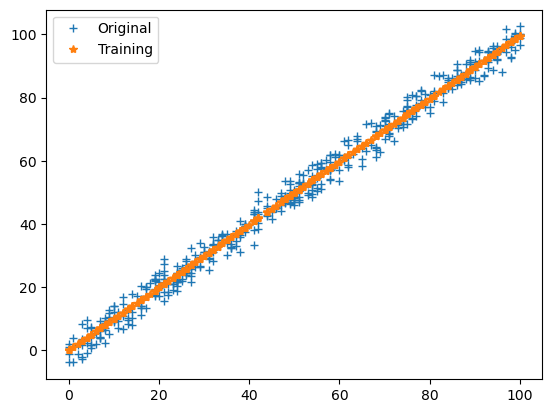

Iteration = 17, Loss = 3.9214991318427583


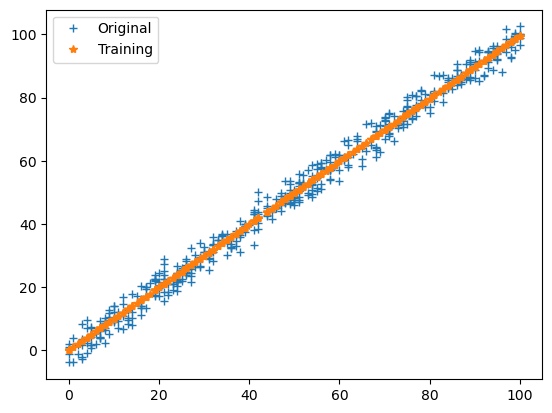

Iteration = 18, Loss = 3.9199452585008556


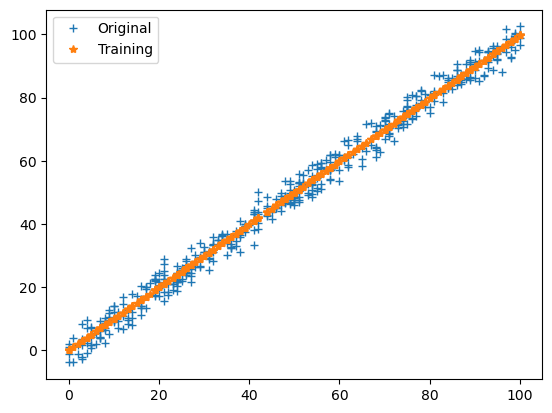

Iteration = 19, Loss = 3.919240036190165


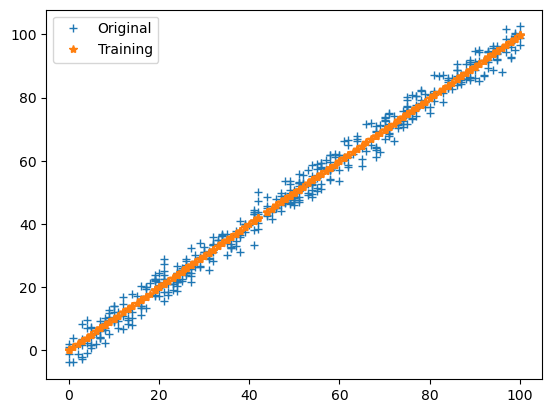

Iteration = 20, Loss = 3.918919847803834


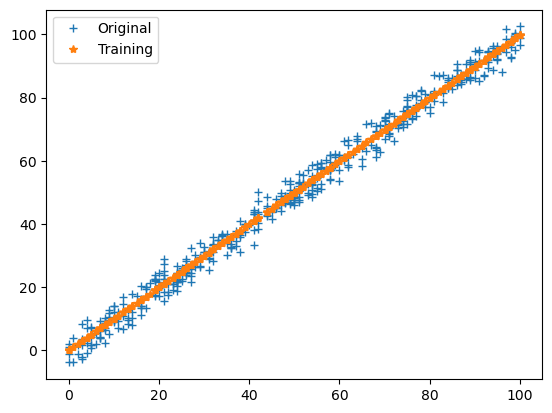

In [17]:
parameters, loss=train(train_input, train_output, 0.0001,20)

In [18]:
print(parameters)

{'m': 0.9968424551764795, 'c': 0.02055590544271134}


In [19]:
loss

[886.0861748670018,
 404.15903941512863,
 185.50816402981786,
 86.30601945235443,
 41.297896348760055,
 20.877660815403303,
 11.6129771072325,
 7.409579618509046,
 5.502493293649568,
 4.637245887335578,
 4.244681952360886,
 4.066575031908044,
 3.985767496496687,
 3.9491047998629636,
 3.9324706654907975,
 3.92492351201266,
 3.9214991318427583,
 3.9199452585008556,
 3.919240036190165,
 3.918919847803834]

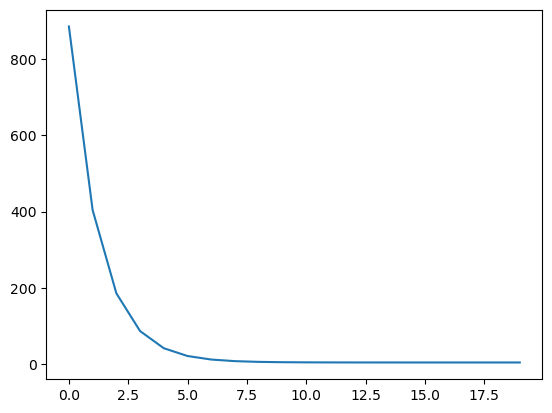

In [20]:
plt.plot(loss)

In [21]:
test_prediction=test_input*parameters['m'] + parameters['c']

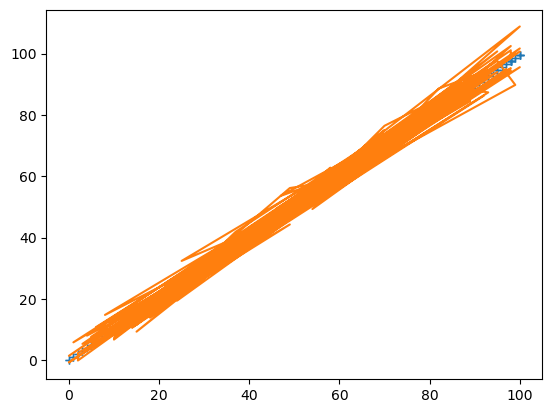

In [22]:
plt.plot(test_input, test_prediction,'+')
plt.plot(test_input, test_output,"-")
plt.show()

In [23]:
cost_function(test_output,test_prediction)

4.000163282079228

# shortcut uding sklearn


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr_model= LinearRegression()

In [26]:
import numpy as np

print("Missing values in train_input:", np.isnan(train_input).sum())
print("Missing values in train_output:", np.isnan(train_output).sum())


Missing values in train_input: 0
Missing values in train_output: 0


In [27]:
# Fill missing values in train_input with the mean of each column
col_means = np.nanmean(train_input, axis=0)
inds = np.where(np.isnan(train_input))
train_input[inds] = np.take(col_means, inds[1])

# Fill missing values in train_output with the mean
train_output_mean = np.nanmean(train_output)
train_output = np.where(np.isnan(train_output), train_output_mean, train_output)


In [28]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(train_input, train_output)


LinearRegression()

In [29]:
lr_model.coef_

array([[1.0009993]])

In [30]:
lr_model.intercept_

array([-0.23603461])

In [31]:
test_prediction=lr_model.predict(test_input)

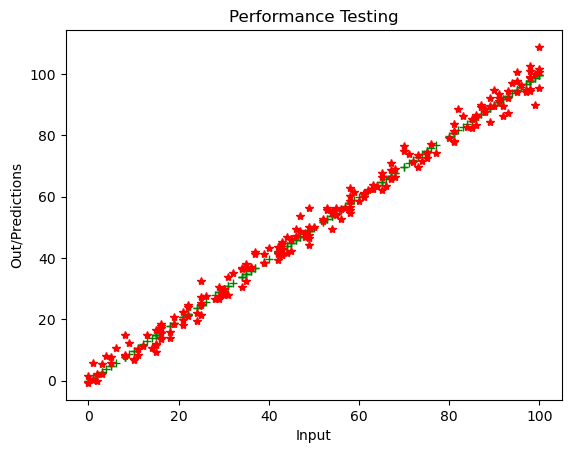

In [32]:
plt.plot(test_input,test_prediction,"+",color="green")
plt.plot(test_input,test_output,"*",color="red")
plt.title("Performance Testing")
plt.xlabel("Input")
plt.ylabel("Out/Predictions")
plt.show()

# cost

In [33]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(test_output, test_prediction)
cost

8.030031591835378